### Submitted by:
- Shahar Asher - 209305408
- Hadar Liel Harush - 211721568

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy import symbols, diff, lambdify, sin
from scipy.optimize import curve_fit
import time

np.random.seed(0)
# %matplotlib auto
%matplotlib inline

Final parameters: a=0.997333333849981, b=2.367999994270291


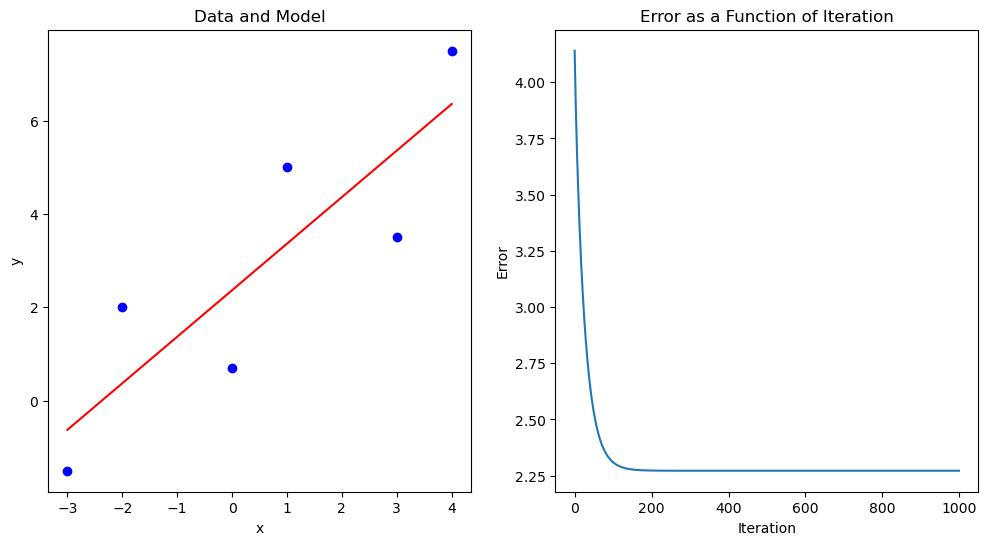

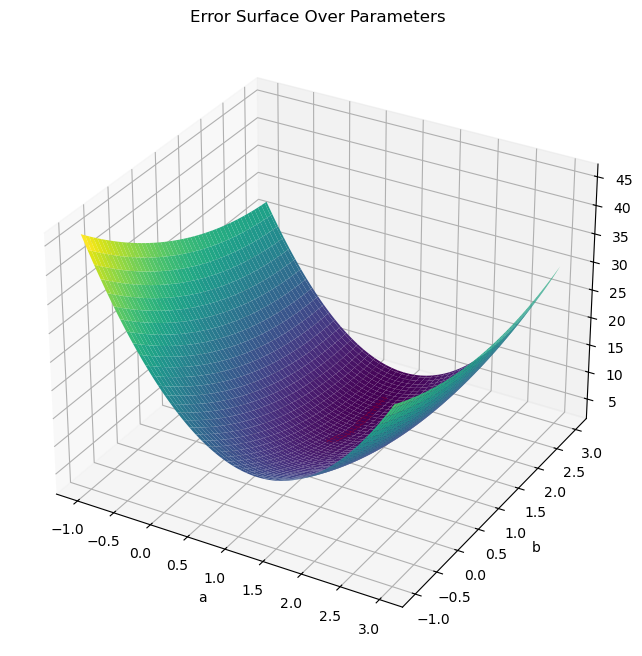

In [8]:
# Data
x = np.array([-3.0, -2.0, 0.0, 1.0, 3.0, 4.0])
y = np.array([-1.5, 2.0, 0.7, 5.0, 3.5, 7.5])

# Initial parameters
a, b = 1, 1

# Learning rate
lr = 0.01

# Number of iterations
iterations = 1000

# To store history of error
errors = []

# To store history of parameters
parameters = np.zeros((iterations, 2))

for i in range(iterations):
    # Calculate prediction
    y_pred = a * x + b

    # Calculate error
    error = y_pred - y
    errors.append((error**2).mean())

    # Calculate gradients
    a_grad = (2 * (error * x).mean())
    b_grad = (2 * error.mean())

    # Update parameters
    a -= lr * a_grad
    b -= lr * b_grad

    parameters[i, :] = [a, b]

# Display results
print(f"Final parameters: a={a}, b={b}")

# Plot data and model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue')
plt.plot(x, a*x + b, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model')

# Plot error as a function of iteration
plt.subplot(1, 2, 2)
plt.plot(range(iterations), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error as a Function of Iteration')
plt.show()

# Plot error surface over parameters
a_values = np.linspace(-1, 3, 100)
b_values = np.linspace(-1, 3, 100)
A, B = np.meshgrid(a_values, b_values)

E = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        y_pred = A[i, j]*x + B[i, j]
        E[i, j] = ((y - y_pred)**2).mean()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, E, cmap='viridis')
ax.plot(parameters[:, 0], parameters[:, 1], errors, 'r.')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Error')
ax.set_title('Error Surface Over Parameters')
plt.show()

Final parameters: a=0.9973333333333335, b=2.367999999999998


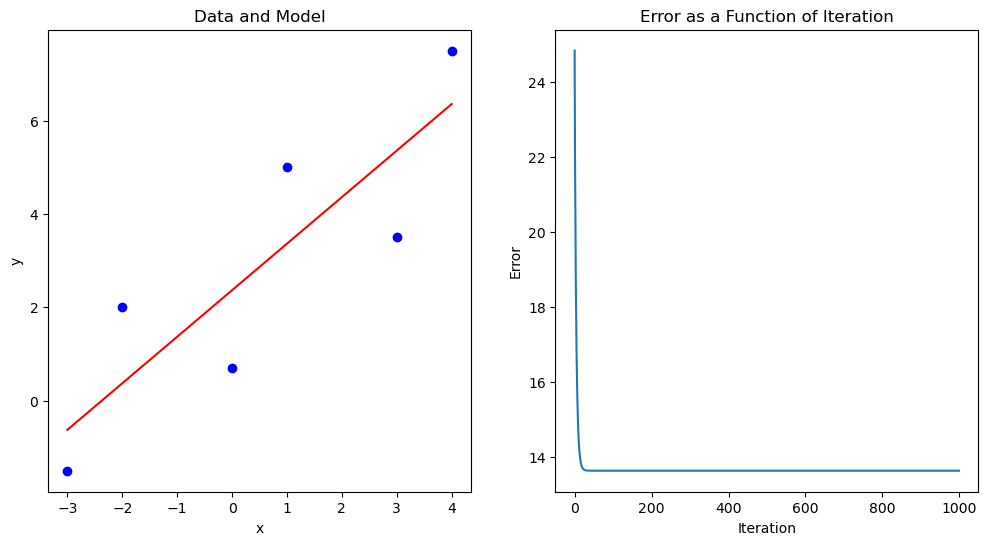

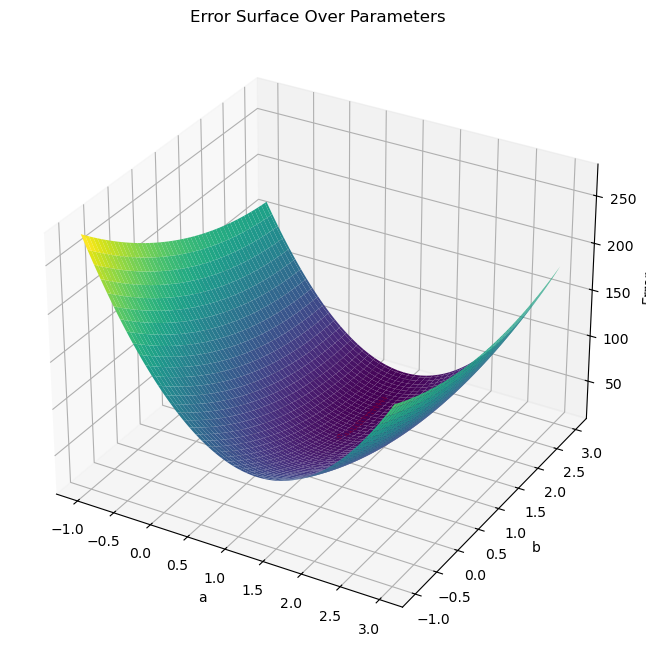

In [9]:
# Data
x_data = np.array([-3.0, -2.0, 0.0, 1.0, 3.0, 4.0])
y_data = np.array([-1.5, 2.0, 0.7, 5.0, 3.5, 7.5])

# Symbols
x, y, a, b = symbols('x,y,a,b')

# Model
f = a*x + b

# Error for a single data point
e = (f - y)**2

# Gradients
grad_a = diff(e, a)
grad_b = diff(e, b)

# Total error
E = sum(e.subs({x: x_val, y: y_val}) for x_val, y_val in zip(x_data, y_data))

# Gradients
grad_E_a = diff(E, a)
grad_E_b = diff(E, b)

# Lambdify
E_func = lambdify((a, b), E, 'numpy')
grad_E_a_func = lambdify((a, b), grad_E_a, 'numpy')
grad_E_b_func = lambdify((a, b), grad_E_b, 'numpy')

# Initial parameters
a_val, b_val = 1, 1

# Learning rate
lr = 0.01

# Number of iterations
iterations = 1000

# To store history of error
errors = []

# To store history of parameters
parameters = np.zeros((iterations, 2))

for i in range(iterations):
    # Calculate error
    error = E_func(a_val, b_val)
    errors.append(error)

    # Calculate gradients
    a_grad = grad_E_a_func(a_val, b_val)
    b_grad = grad_E_b_func(a_val, b_val)

    # Update parameters
    a_val -= lr * a_grad
    b_val -= lr * b_grad

    parameters[i, :] = [a_val, b_val]

# Display results
print(f"Final parameters: a={a_val}, b={b_val}")

# Plot data and model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, color='blue')
plt.plot(x_data, a_val*x_data + b_val, color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model')

# Plot error as a function of iteration
plt.subplot(1, 2, 2)
plt.plot(range(iterations), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error as a Function of Iteration')
plt.show()

# Plot error surface over parameters
a_values = np.linspace(-1, 3, 100)
b_values = np.linspace(-1, 3, 100)
A, B = np.meshgrid(a_values, b_values)

E = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        E[i, j] = E_func(A[i, j], B[i, j])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, E, cmap='viridis')
ax.plot(parameters[:, 0], parameters[:, 1], errors, 'r.')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Error')
ax.set_title('Error Surface Over Parameters')
plt.show()

Final parameters: a=3.280345856906753, b=1.4895161671221442


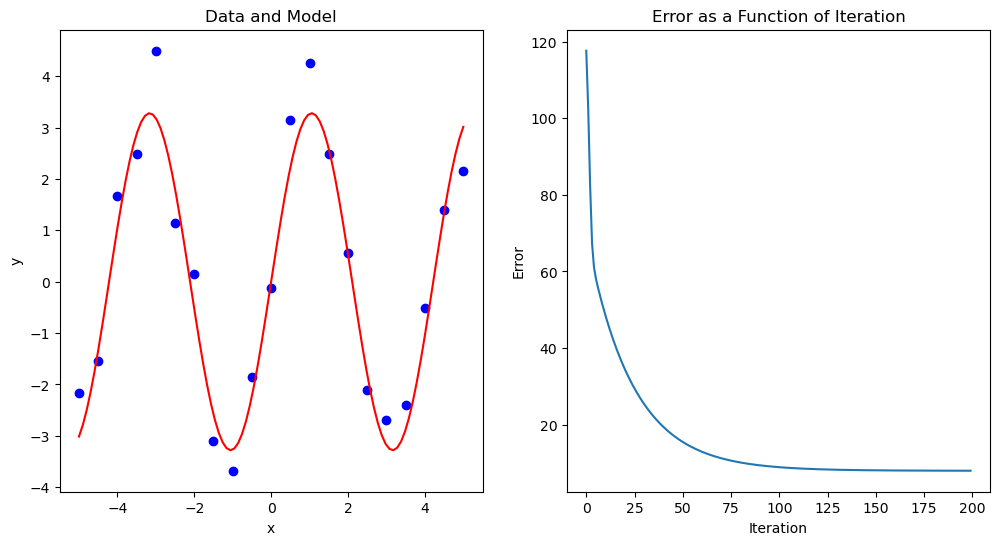

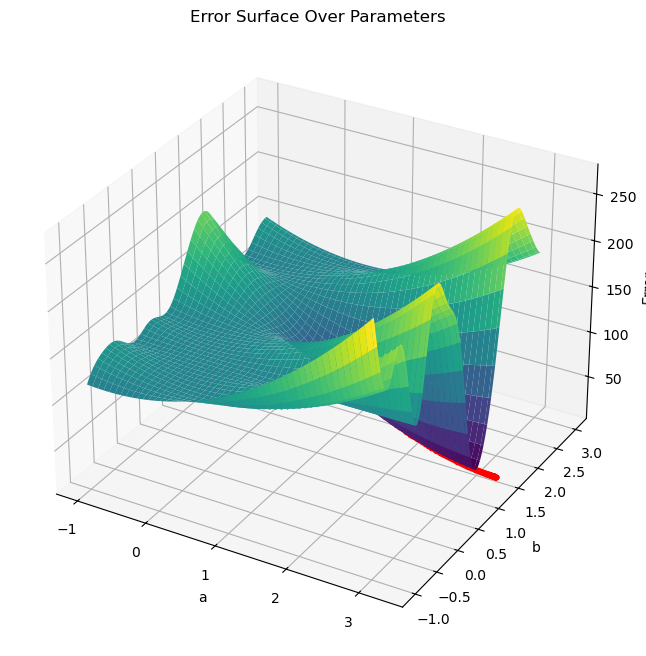

In [10]:
# Data
x_data = np.array([-5., -4.5, -4., -3.5, -3., -2.5, -2., -1.5, -1., -0.5, 0.,
                   0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5. ])
y_data = np.array([-2.16498306, -1.53726731, 1.67075645, 2.47647932, 4.49579917,
                   1.14600963, 0.15938811, -3.09848048, -3.67902427, -1.84892687,
                   -0.11705947, 3.14778203, 4.26365256, 2.49120585, 0.55300516,
                   -2.105836 , -2.68898773, -2.39982575, -0.50261972, 1.40235643,
                   2.15371399])

# Symbols
a, b = symbols('a b')
x, y = symbols('x y')

# Model
f = a * sin(b * x)

# Error for a single data point
e = (f - y)**2

# Gradients
grad_a = diff(e, a)
grad_b = diff(e, b)

# Total error
E = sum(e.subs({x: x_val, y: y_val}) for x_val, y_val in zip(x_data, y_data))

# Gradients
grad_E_a = diff(E, a)
grad_E_b = diff(E, b)

# Lambdify
E_func = lambdify((a, b), E, 'numpy')
grad_E_a_func = lambdify((a, b), grad_E_a, 'numpy')
grad_E_b_func = lambdify((a, b), grad_E_b, 'numpy')

# Initial parameters
a_val, b_val = 1, 1  # You might need to adjust these initial values

# Learning rate
lr = 0.001

# Number of iterations
iterations = 200

# To store history of error
errors = []

# To store history of parameters
parameters = np.zeros((iterations, 2))

for i in range(iterations):
    # Calculate error
    error = E_func(a_val, b_val)
    errors.append(error)

    # Calculate gradients
    a_grad = grad_E_a_func(a_val, b_val)
    b_grad = grad_E_b_func(a_val, b_val)

    # Update parameters
    a_val -= lr * a_grad
    b_val -= lr * b_grad

    parameters[i, :] = [a_val, b_val]

# Display results
print(f"Final parameters: a={a_val}, b={b_val}")

# Plot data and model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, color='blue')
plt.plot(np.linspace(-5, 5, 100),  a_val * np.sin(b_val * np.linspace(-5, 5, 100)), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model')

# Plot error as a function of iteration
plt.subplot(1, 2, 2)
plt.plot(range(iterations), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error as a Function of Iteration')
plt.show()

# Plot error surface over parameters
a_values = np.linspace(-1, 3, 100)
b_values = np.linspace(-1, 3, 100)
A, B = np.meshgrid(a_values, b_values)

E = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        E[i, j] = E_func(A[i, j], B[i, j])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, E, cmap='viridis')
ax.plot(parameters[:, 0], parameters[:, 1], errors, 'r.')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Error')
ax.set_title('Error Surface Over Parameters')
plt.show()

Final parameters: a=3.318145436025057, b=1.488977981749276


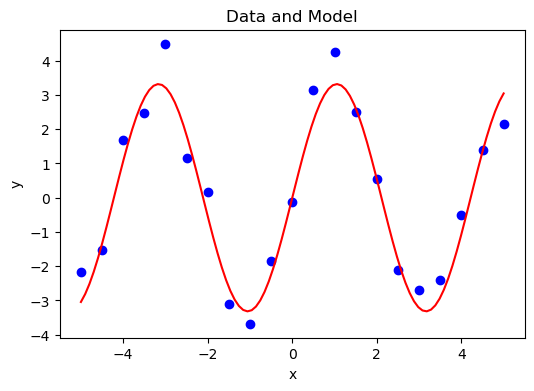

In [11]:
# The model function
def model(x, a, b):
    """Defines the model function."""
    return a * np.sin(b * x)

# The data
x_data = np.array([-5., -4.5, -4., -3.5, -3., -2.5, -2., -1.5, -1., -0.5, 0.,
                   0.5, 1., 1.5, 2., 2.5, 3., 3.5, 4., 4.5, 5. ])
y_data = np.array([-2.16498306, -1.53726731, 1.67075645, 2.47647932, 4.49579917,
                   1.14600963, 0.15938811, -3.09848048, -3.67902427, -1.84892687,
                   -0.11705947, 3.14778203, 4.26365256, 2.49120585, 0.55300516,
                   -2.105836 , -2.68898773, -2.39982575, -0.50261972, 1.40235643,
                   2.15371399])

# Use curve_fit to find the parameters of the model
popt, pcov = curve_fit(model, x_data, y_data)

# Print the found parameters
print(f"Final parameters: a={popt[0]}, b={popt[1]}")

# Display the model with the found parameters
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, color='blue')
plt.plot(np.linspace(-5, 5, 100), model(np.linspace(-5, 5, 100), *popt), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model')
plt.show()

## The model: 
<math display="block"><semantics><mrow><mi>Y</mi><mo>=</mo><mi>a</mi><mo>⋅</mo><mi>sin</mi><mo>⁡</mo><mo stretchy="false">(</mo><mi>b</mi><mi>x</mi><mo>+</mo><mi>c</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">Y = a \cdot \sin(bx + c)</annotation></semantics></math>

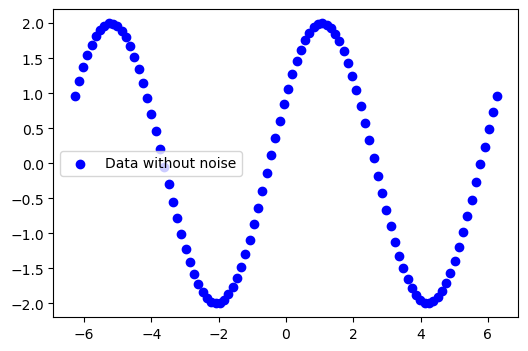

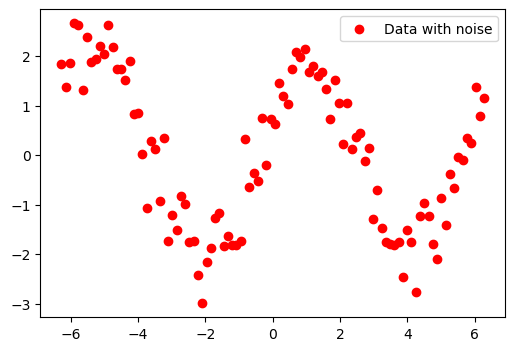

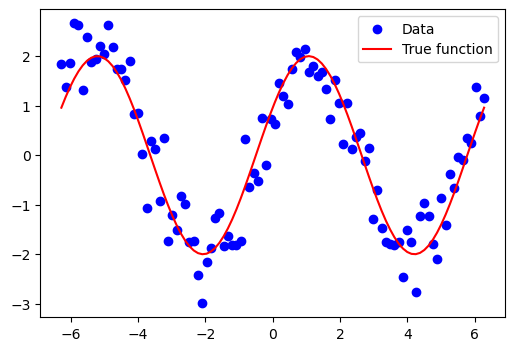

Time elapsed for gradient descent: 1.2927074432373047 seconds
Final parameters: a=2.0081125397799204, b=1.0092632527092733, c=0.536024564951171
Parameters found by curve_fit: a=2.0156616351282866, b=1.0093224363174194, c=0.5359304117967073
Time elapsed for curve_fit: 0.0 seconds


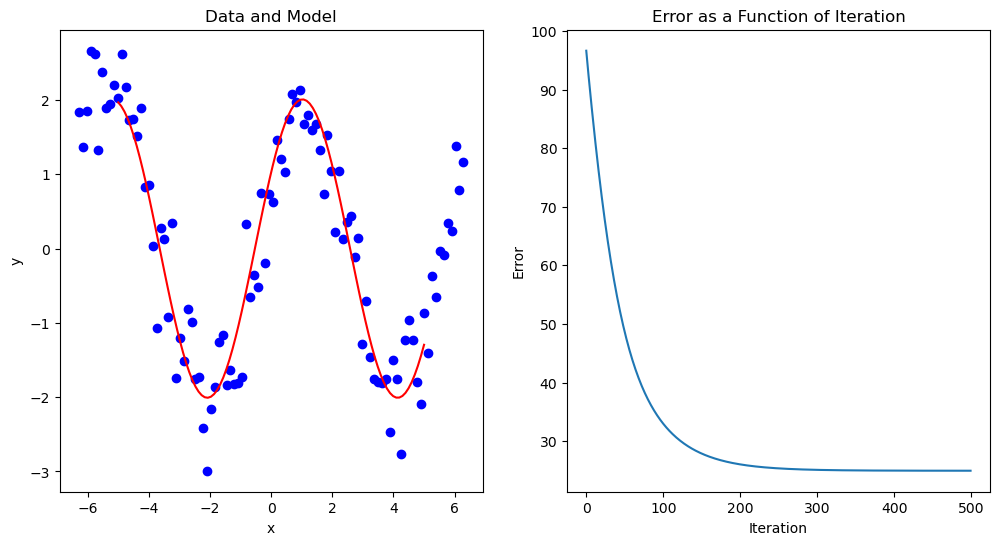

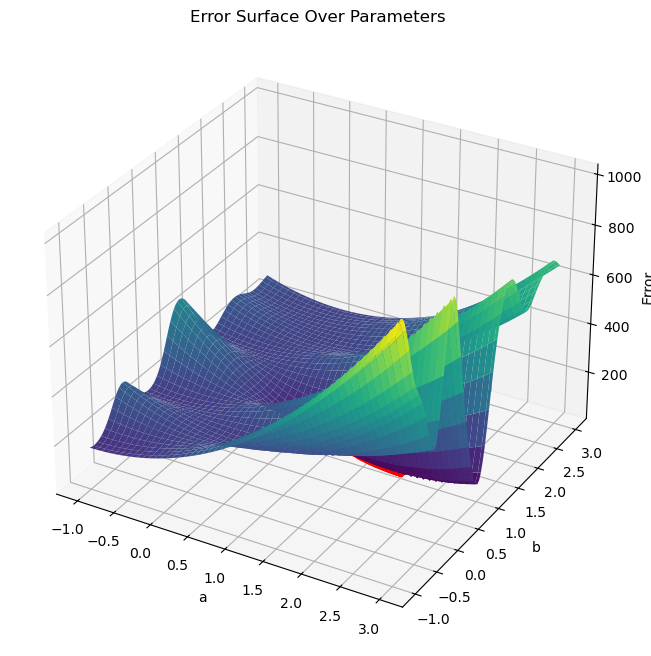

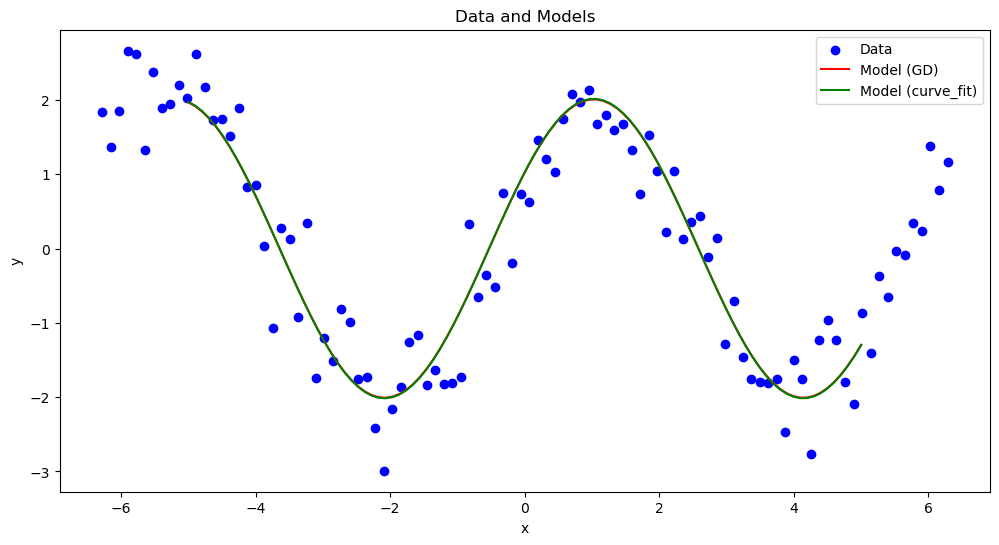

In [12]:
def model_func(x, a, b, c):
    """Defines the model function."""
    return a * np.sin(b * x + c)

# Start the timer
start_time = time.time()

# Define the true parameters
a_true = 2
b_true = 1
c_true = 0.5

# Generate synthetic data
x_data = np.linspace(-2*np.pi, 2*np.pi, 100)
y_true = a_true * np.sin(b_true * x_data + c_true)


# Display the data before adding noise
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_true, color='blue', label='Data without noise')
plt.legend()
plt.show()

# Add Gaussian noise
noise = np.random.normal(0, 0.5, size=y_true.shape)
y_data = y_true + noise

# Display the data after adding noise
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, color='red', label='Data with noise')
plt.legend()
plt.show()

# Display the data
plt.figure(figsize=(6, 4))
plt.scatter(x_data, y_data, color='blue', label='Data')
plt.plot(x_data, y_true, color='red', label='True function')
plt.legend()
plt.show()

# Symbols
x, y, a, b, c = symbols('x y a b c')

# Model
f = a * sin(b * x + c)

# Error for a single data point
e = (y - f)**2

# Gradients
grad_a = diff(e, a)
grad_b = diff(e, b)
grad_c = diff(e, c)

# Total error
E = sum(e.subs({x: x_val, y: y_val}) for x_val, y_val in zip(x_data, y_data))

# Gradients
grad_E_a = diff(E, a)
grad_E_b = diff(E, b)
grad_E_c = diff(E, c)

# Lambdify
E_func = lambdify((a, b, c), E, 'numpy')
grad_E_a_func = lambdify((a, b, c), grad_E_a, 'numpy')
grad_E_b_func = lambdify((a, b, c), grad_E_b, 'numpy')
grad_E_c_func = lambdify((a, b, c), grad_E_c, 'numpy')

# Initial parameters
a_val, b_val, c_val = 1, 1, 1

# Learning rate
lr = 0.0001

# Number of iterations
iterations = 500

# To store history of error
errors = []

# To store history of parameters
parameters = np.zeros((iterations, 3))

for i in range(iterations):
    # Calculate error
    error = E_func(a_val, b_val, c_val)
    errors.append(error)

    # Calculate gradients
    a_grad = grad_E_a_func(a_val, b_val, c_val)
    b_grad = grad_E_b_func(a_val, b_val, c_val)
    c_grad = grad_E_c_func(a_val, b_val, c_val)

    # Update parameters
    a_val -= lr * a_grad
    b_val -= lr * b_grad
    c_val -= lr * c_grad

    parameters[i, :] = [a_val, b_val, c_val]

# Stop the timer and print the elapsed time
elapsed_time = time.time() - start_time
print(f"Time elapsed for gradient descent: {elapsed_time} seconds")

# Display results
print(f"Final parameters: a={a_val}, b={b_val}, c={c_val}")

# Do the same for curve_fit
start_time = time.time()
# Use curve_fit to fit the model to the data
popt, pcov = curve_fit(model_func, x_data, y_data)
print(f"Parameters found by curve_fit: a={popt[0]}, b={popt[1]}, c={popt[2]}")
elapsed_time = time.time() - start_time
print(f"Time elapsed for curve_fit: {elapsed_time} seconds")

# Plot data and model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(x_data, y_data, color='blue')
plt.plot(np.linspace(-5, 5, 100), a_val*np.sin(b_val*np.linspace(-5, 5, 100) + c_val), color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Model')

# Plot error as a function of iteration
plt.subplot(1, 2, 2)
plt.plot(range(iterations), errors)
plt.xlabel('Iteration')
plt.ylabel('Error')
plt.title('Error as a Function of Iteration')
plt.show()

# Plot error surface over parameters
a_values = np.linspace(-1, 3, 100)
b_values = np.linspace(-1, 3, 100)
c_values = np.linspace(-1, 3, 100)
A, B = np.meshgrid(a_values, b_values)

E = np.zeros_like(A)
for i in range(A.shape[0]):
    for j in range(A.shape[1]):
        E[i, j] = E_func(A[i, j], B[i, j], c_true)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A, B, E, cmap='viridis')
ax.plot(parameters[:, 0], parameters[:, 1], errors, 'r.')
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Error')
ax.set_title('Error Surface Over Parameters')
plt.show()


# Plot data and models
plt.figure(figsize=(12, 6))
plt.scatter(x_data, y_data, color='blue', label='Data')
plt.plot(np.linspace(-5, 5, 100), a_val*np.sin(b_val*np.linspace(-5, 5, 100) + c_val), color='red', label='Model (GD)')
plt.plot(np.linspace(-5, 5, 100), popt[0]*np.sin(popt[1]*np.linspace(-5, 5, 100) + popt[2]), color='green', label='Model (curve_fit)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.title('Data and Models')
plt.show()